In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
# load dataset

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/enzyme_data.csv'

data = pd.read_csv(url)

print(data)

    enzyme     Type Segment
0       62     Sick     DCT
1       73     Sick     DCT
2       58     Sick     DCT
3       66     Sick     DCT
4       15     Sick     CCD
5       31     Sick     CCD
6       19     Sick     CCD
7       35     Sick     CCD
8        7     Sick    OMCD
9        7     Sick    OMCD
10       9     Sick    OMCD
11      17     Sick    OMCD
12      44  Healthy     DCT
13      49  Healthy     DCT
14      46  Healthy     DCT
15      37  Healthy     DCT
16       8  Healthy     CCD
17      36  Healthy     CCD
18      11  Healthy     CCD
19      18  Healthy     CCD
20      19  Healthy    OMCD
21       7  Healthy    OMCD
22      15  Healthy    OMCD
23       4  Healthy    OMCD


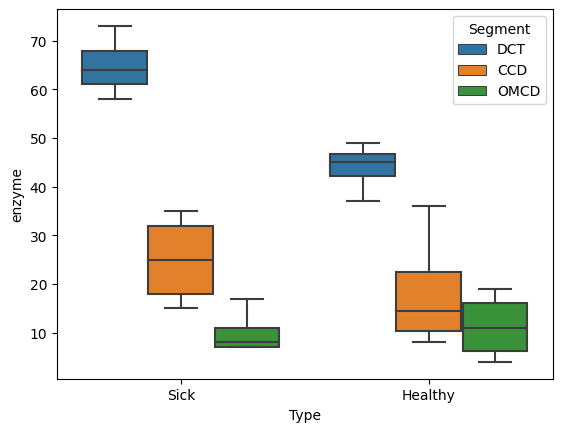

In [4]:
# present data boxplot

sns.boxplot(data=data, x="Type", y="enzyme", hue="Segment", orient = 'v')
plt.show()

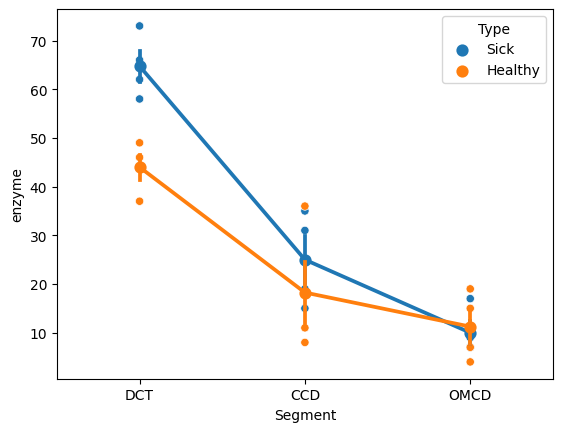

In [5]:
# present data scatter + lineplot

sns.scatterplot(data=data, x="Segment", y="enzyme",  hue="Type", legend = False)
sns.pointplot(data=data, x="Segment", y="enzyme", hue="Type", errorbar = 'se')
plt.show()

In [6]:
# anova test prepare

enzyme_all = data.enzyme

sick = data.enzyme[data.Type=='Sick']
healthy = data.enzyme[data.Type=='Healthy']

DCT = data.enzyme[data.Segment=='DCT']
CCD = data.enzyme[data.Segment=='CCD']
OMCD = data.enzyme[data.Segment=='OMCD']

sickDCT = data.enzyme[(data.Type=='Sick') & (data.Segment=='DCT')]
sickCCD = data.enzyme[(data.Type=='Sick') & (data.Segment=='CCD')]
sickOMCD = data.enzyme[(data.Type=='Sick') & (data.Segment=='OMCD')]
healthyDCT = data.enzyme[(data.Type=='Healthy') & (data.Segment=='DCT')]
healthyCCD = data.enzyme[(data.Type=='Healthy') & (data.Segment=='CCD')]
healthyOMCD = data.enzyme[(data.Type=='Healthy') & (data.Segment=='OMCD')]

N, n, a, b = len(enzyme_all), len(sickDCT), len(pd.unique(data.Type)), len(pd.unique(data.Segment))

In [7]:
# anova test prepare 2

SStot = (enzyme_all-enzyme_all.mean())@(enzyme_all-enzyme_all.mean())
dftot = N-1

SSres = (sickDCT-sickDCT.mean())@(sickDCT-sickDCT.mean()) + \
        (sickCCD-sickCCD.mean())@(sickCCD-sickCCD.mean()) + \
        (sickOMCD-sickOMCD.mean())@(sickOMCD-sickOMCD.mean()) + \
        (healthyDCT-healthyDCT.mean())@(healthyDCT-healthyDCT.mean()) + \
        (healthyCCD-healthyCCD.mean())@(healthyCCD-healthyCCD.mean()) + \
        (healthyOMCD-healthyOMCD.mean())@(healthyOMCD-healthyOMCD.mean())
dfres = N-a*b
MSres = SSres/dfres

SSa = b*n*( (sick.mean()-enzyme_all.mean())**2+(sick.mean()-enzyme_all.mean())**2 )
dfa = a-1
MSa = SSa/dfa

SSb = a*n*( (DCT.mean()-enzyme_all.mean())**2 + (CCD.mean()-enzyme_all.mean())**2 + (OMCD.mean()-enzyme_all.mean())**2 )
dfb = b-1
MSb = SSb/dfb

SSab = SStot-SSres-SSa-SSb
dfab = (a-1)*(b-1)
MSab = SSab/dfab


In [8]:
# two-way anova (F test)

Fa = MSa/MSres
Fb = MSb/MSres
Fab = MSab/MSres

p_a = 1-stats.f.cdf(Fa,dfa,dfres)
p_b = 1-stats.f.cdf(Fb,dfb,dfres)
p_ab = 1-stats.f.cdf(Fab,dfab,dfres)

print('Fa = {}, pa = {}\nFb = {}, pb = {}\nFab = {}, pab = {}'.format(Fa,p_a,Fb,p_b,Fab,p_ab))

Fa = 7.139002805957262, pa = 0.015551678465012486
Fb = 64.39283401683574, pb = 6.270463814850302e-09
Fab = 3.854090222318152, pab = 0.04043993883338026


In [9]:
# effect size

eta_a = SSa/SStot
eta_b = SSb/SStot
eta_ab = SSab/SStot

print('\u03B72a = {}, \u03B72b = {}, \u03B72ab = {}'.format(eta_a,eta_b,eta_ab))

η2a = 0.044168018748873265, η2b = 0.7967790397211706, η2ab = 0.04768944174028003


In [10]:
# two-way anova using function

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols('enzyme ~ Type + Segment + Type:Segment', data=data).fit()
sm.stats.anova_lm(model, type=2)


,df,sum_sq,mean_sq,F,PR(>F)
Type,1.0,459.375,459.375000,7.139003,1.555168e-02
Segment,2.0,8287.000,4143.500000,64.392834,6.270464e-09
Type:Segment,2.0,496.000,248.000000,3.854090,4.043994e-02
Residual,18.0,1158.250,64.347222,NaN,NaN


In [11]:
# solution using dummy variables reference coding
# build X matrix

y = data['enzyme']
D0 = np.ones((N,1))
DH = np.concatenate((np.zeros((len(sick),1)),np.ones((len(healthy),1))))
DA1 = np.zeros((N,1))
DA1[data.Segment=='CCD'] = 1
DA2 = np.zeros((N,1))
DA2[data.Segment=='OMCD'] = 1
DHA1 = DH*DA1
DHA2 = DH*DA2

X = np.concatenate((D0,DH,DA1,DA2,DHA1,DHA2),axis=1)
print(X)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1.]]


In [12]:
# solve for regression

b = np.linalg.pinv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-3)

print(b)

[ 64.75 -20.75 -39.75 -54.75  14.    22.  ]


In [ ]:
# solution using dummy variables effects coding
# build X matrix

y = data['enzyme']
D0 = np.ones((N,1))
DH = np.concatenate((np.ones((len(sick),1)),-np.ones((len(healthy),1))))
DA1 = np.zeros((N,1))
DA1[data.Segment=='DCT'] = 1
DA1[data.Segment=='OMCD'] = -1
DA2 = np.zeros((N,1))
DA2[data.Segment=='CCD'] = 1
DA2[data.Segment=='OMCD'] = -1
DHA1 = DH*DA1
DHA2 = DH*DA2

X = np.concatenate((D0,DH,DA1,DA2,DHA1,DHA2),axis=1)
print(X)

[[ 1.  1.  1.  0.  1.  0.]
 [ 1.  1.  1.  0.  1.  0.]
 [ 1.  1.  1.  0.  1.  0.]
 [ 1.  1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  1.]
 [ 1.  1.  0.  1.  0.  1.]
 [ 1.  1.  0.  1.  0.  1.]
 [ 1.  1.  0.  1.  0.  1.]
 [ 1.  1. -1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  0. -1. -0.]
 [ 1. -1.  1.  0. -1. -0.]
 [ 1. -1.  1.  0. -1. -0.]
 [ 1. -1.  1.  0. -1. -0.]
 [ 1. -1.  0.  1. -0. -1.]
 [ 1. -1.  0.  1. -0. -1.]
 [ 1. -1.  0.  1. -0. -1.]
 [ 1. -1.  0.  1. -0. -1.]
 [ 1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1.  1.]]


In [13]:
# find coefficients

b = np.linalg.pinv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-len(b))

print(b)

[ 64.75 -20.75 -39.75 -54.75  14.    22.  ]


In [14]:
# model significance and effect size

SSreg = (yhat-y.mean())@(yhat-y.mean())
df_reg = len(b)-1
MSreg = SSreg/df_reg

SSres = (y-yhat)@(y-yhat)
df_res = len(y)-len(b)
MSres = SSres/df_res

Fstat = MSreg/MSres
p = 1-stats.f.cdf(Fstat,df_reg,df_res)

R2 = SSreg/(SSreg+SSres)

print('Model significance: F-statistic = {} , p-value = {}'.format(round(Fstat,4),round(p,4)))
print('Model effect size: R2 = {}'.format(round(R2,4)))


Model significance: F-statistic = 28.7266 , p-value = 0.0
Model effect size: R2 = 0.8886


In [15]:
# coefficient significance
Sb2_mat = Syx2*np.linalg.pinv(X.T@X)
print(Sb2_mat.round(decimals = 4))

b_p = np.zeros((len(b),))
for i in range(len(b)):
  bi_stat = b[i]/(Sb2_mat[i,i])**0.5
  b_p[i] = 1-stats.t.cdf(abs(bi_stat),df_res)

print('model coefficient significance: b0: {} , b1: {} , b2: {}, b3: {} , b4: {} , b5: {}'.format(round(b_p[0],4),\
       round(b_p[1],4),round(b_p[2],4),round(b_p[3],4),round(b_p[4],4),round(b_p[5],4)))


[[ 16.0868 -16.0868 -16.0868 -16.0868  16.0868  16.0868]
 [-16.0868  32.1736  16.0868  16.0868 -32.1736 -32.1736]
 [-16.0868  16.0868  32.1736  16.0868 -32.1736 -16.0868]
 [-16.0868  16.0868  16.0868  32.1736 -16.0868 -32.1736]
 [ 16.0868 -32.1736 -32.1736 -16.0868  64.3472  32.1736]
 [ 16.0868 -32.1736 -16.0868 -32.1736  32.1736  64.3472]]
model coefficient significance: b0: 0.0 , b1: 0.0009 , b2: 0.0, b3: 0.0 , b4: 0.049 , b5: 0.0067


In [16]:
# different factors contribution addition test for factor

# factor of type (sick/healthy)
X_noH = np.concatenate((D0,DA1,DA2,DHA1,DHA2),axis=1)
b_noH = np.linalg.pinv(X_noH.T@X_noH)@X_noH.T@y
yhat_noH = np.dot(X_noH,b_noH)

SS_H = (yhat-yhat_noH)@(yhat-yhat_noH)
df_H = len(pd.unique(data.Type))-1
MS_H = SS_H/df_H
f_H = MS_H/MSres
p_H = 1-stats.f.cdf(f_H,df_H,df_res)

# factor of area (DCT/CCD/OMCD)
X_noA = np.concatenate((D0,DH,DHA1,DHA2),axis=1)
b_noA = np.linalg.inv(X_noA.T@X_noA)@X_noA.T@y
yhat_noA = np.dot(X_noA,b_noA)

SS_A = (yhat-yhat_noA)@(yhat-yhat_noA)
df_A = len(pd.unique(data.Segment))-1
MS_A = SS_A/df_A
f_A = MS_A/MSres
p_A = 1-stats.f.cdf(f_A,df_A,df_res)

# factor of interaction
X_noHA = np.concatenate((D0,DH,DA1,DA2),axis=1)
b_noHA = np.linalg.inv(X_noHA.T@X_noHA)@X_noHA.T@y
yhat_noHA = np.dot(X_noHA,b_noHA)

SS_HA = (yhat-yhat_noHA)@(yhat-yhat_noHA)
df_HA = (len(pd.unique(data.Type))-1)*(len(pd.unique(data.Segment))-1)
MS_HA = SS_HA/df_HA
f_HA = MS_HA/MSres
p_HA = 1-stats.f.cdf(f_HA,df_HA,df_res)

print('p type = {} , p area = {} , p interactions = {}'.format(round(p_H,4),round(p_A,4),round(p_HA,4)))

p type = 0.0018 , p area = 0.0 , p interactions = 0.0404


In [17]:
# effect size for factors

SStot = (y-y.mean())@(y-y.mean())
eta2_H = SS_H/SStot
eta2_A = SS_A/SStot
eta2_HA = SS_HA/SStot

print('factors effect size: \u03B72 type = {} , \u03B72 area = {} , \u03B72 interactions = {}'.format(round(eta2_H,4),\
                                                                                    round(eta2_A,4),round(eta2_HA,4)))

factors effect size: η2 type = 0.0828 , η2 area = 0.6157 , η2 interactions = 0.0477


In [18]:
# compare groups - significance

# sick vs healthy in DCT

t_S_H_DCT = 2*(b[1]+b[4])/(4*Sb2_mat[1,1]+4*Sb2_mat[4,4]+8*Sb2_mat[1,4])**0.5

p_S_H_DCT = 1-stats.t.cdf(abs(t_S_H_DCT),df_res)

print('sick vs healthy in DCT p value = {}'.format(round(p_S_H_DCT,4)))

sick vs healthy in DCT p value = 0.1247


In [19]:
# compare groups - effect size

# sick vs healthy in DCT

eta2_SH_DCT = 2*(b[1]+b[4])/MSres**0.5

print('sick vs healthy in DCT effect size = {}'.format(round(eta2_SH_DCT,4)))

sick vs healthy in DCT effect size = -1.6829


In [20]:
# compare groups - significance

# DCT vs OMCD

t_DCT_OMCD = (2*b[2]+b[3])/(4*Sb2_mat[2,2]+Sb2_mat[3,3]+4*Sb2_mat[2,3])**0.5

p_DCT_OMCD = 1-stats.t.cdf(abs(t_DCT_OMCD),df_res)

print('DCT vs OMCD p value = {}'.format(p_DCT_OMCD))

DCT vs OMCD p value = 2.4094436334998193e-08


In [21]:
# compare groups - effect size

# DCT vs OMCD

eta2_DCT_OMCD =(2*b[2]+b[3])/MSres**0.5

print('DCT vs OMCD effect size = {}'.format(round(eta2_DCT_OMCD,4)))

DCT vs OMCD effect size = -16.7359


In [22]:
# compare groups - significance

# DCT vs CCD in healthy

t_DCT_CCD_H = (b[2]-b[3]-b[4]+b[5])/\
 (Sb2_mat[2,2]+Sb2_mat[3,3]+Sb2_mat[4,4]+Sb2_mat[5,5] - \
  2*Sb2_mat[2,3]-2*Sb2_mat[2,4]+2*Sb2_mat[2,5]+2*Sb2_mat[3,4]-2*Sb2_mat[3,5]-2*Sb2_mat[4,5])**0.5

p_DCT_CCD_H = 1-stats.t.cdf(abs(t_DCT_CCD_H),df_res)

print('DCT vs CCD in healthy p value = {}'.format(p_DCT_CCD_H))

DCT vs CCD in healthy p value = 0.043239905183169


In [23]:
# compare groups - effect size

# DCT vs CCD in healthy

eta2_DCT_CCD_H =(b[2]-b[3]-b[4]+b[5])/MSres**0.5

print(' DCT vs CCD in healthy effect size = {}'.format(round(eta2_DCT_CCD_H,4)))

 DCT vs CCD in healthy effect size = 2.8672


In [24]:
# compare groups - significance

# sick vs healthy

t_S_H = 2*b[1]/(4*Sb2_mat[1,1])**0.5

p_S_H = 1-stats.t.cdf(abs(t_S_H),df_res)

print('sick vs healthy p value = {}'.format(p_S_H))

sick vs healthy p value = 0.0008992388107029736


In [25]:
# compare groups - effect size

# sick vs healthy

eta2_S_H = 2*b[1]/MSres**0.5

print(' sick vs healthy effect size = {}'.format(round(eta2_S_H,4)))

 sick vs healthy effect size = -5.1735
